<a href="https://colab.research.google.com/github/revanth-eranki/dl-notebooks/blob/main/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import open
import os,string,random,time,math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
from IPython.display import clear_output

# Dataset

In [ ]:
languages = []
data = []
X = []
y = []
with open('name2lang.txt','r') as f:
  for line in f:
    line = line.split(',')            #The split() method splits a string into a list.
    name = line[0].strip()            #The strip() method removes any leading, and trailing whitespaces.
    lang = line[1].strip()
    if not lang in languages:
      languages.append(lang)
    X.append(name)
    y.append(lang)
    data.append((name,lang))


n_languages = len(languages)

In [ ]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [ ]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


#Train-Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0,stratify=y)

In [ ]:
print(X_train)

['Abashkin', 'Gulimov', 'Tzelobenok', 'Funnell', 'Zhui', 'Jukes', 'Togunov', 'Sabbag', 'Kartomyshev', 'Makhnenko', 'Sokolsky', 'Masuno', 'Varela', 'Moffat', 'Bonner', 'Berezovsky', 'Helkvist', 'Thurston', 'Tovstuha', 'Millar', 'Tulintsev', 'Furey', 'Isaenko', 'Kalachev', 'Takecare', 'Newcombe', 'Taku', 'Artibyakin', 'Saifulov', 'Morcos', 'Jagodnikov', 'Halifman', 'Bagaryakoff', 'Pavluhin', 'Mari', 'Awramchik', 'Agaltsov', 'Fisichev', 'Shizuma', 'Yankin', 'Luts', 'Toshitala', 'Germain', 'Botros', 'Poulter', 'Lischenko', 'Porter', 'Melendez', 'Ibu', 'Carr', 'Ursler', 'Aderikhin', 'Gimondi', 'Rzhevsky', 'Slater', 'Atkin', 'Yagafarov', 'Huraskin', 'Underhill', 'Pylin', 'Yuschenko', 'Ardovini', 'Tunison', 'Dobrovolsky', 'Bezyzvestnyh', 'Roussel', 'Balakshin', 'Trumbauer', 'Vallance', 'Boerio', 'Waugh', 'Baz', 'Reading', 'Komon', 'Ireson', 'Venables', 'Tikhotsky', 'Spada', 'Winfield', 'Mikhnov', 'Lubsky', 'Antar', 'Sheehan', 'Tuma', 'Yuzefovich', 'Yamburg', 'Yukhvidov', 'Mikhail', 'Chi', 'De

In [ ]:
print(len(X_train),len(X_test))

16040 4010


# Encoding names and languages

In [ ]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [ ]:
def name_rep(name):
  rep = torch.zeros(len(name),1,n_letters)
  for index,letter in enumerate(name):
    pos = all_letters.find(letter)
    rep[index][0][pos] = 1
  return rep

In [ ]:
def lang_rep(lang):
  return torch.tensor([languages.index(lang)],dtype = torch.long)

In [ ]:
name_rep('Abreu')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
lang_rep('Portuguese')

tensor([0])

#Basic Visualisation

In [ ]:
count = {}
for l in languages:
  count[l] = 0
for d in data:
  count[d[1]] += 1

In [ ]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


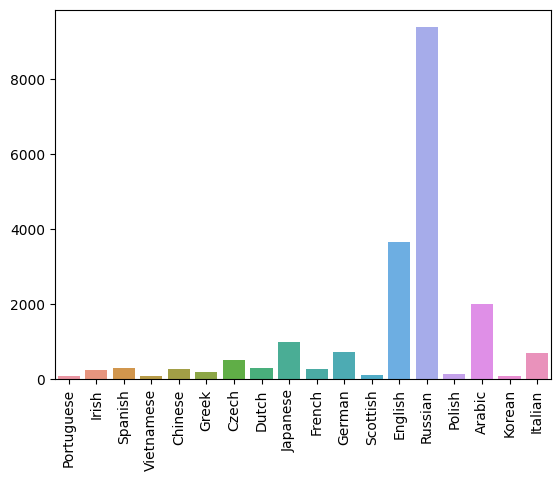

In [ ]:
plt_ = sns.barplot(x=list(count.keys()),y=list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(),rotation = 90)
plt.show()

#Basic network and Testing inference

In [ ]:
class RNN_net(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(RNN_net,self).__init__()
    self.hidden_size = hidden_size
    self.i2h = nn.Linear(input_size + hidden_size,hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size,output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self,input_,hidden):
    combined = torch.cat((input_,hidden),1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output,hidden

  def init_hidden(self):
    return torch.zeros(1,self.hidden_size)

In [ ]:
n_hidden = 128
net = RNN_net(n_letters,n_hidden,n_languages)

In [ ]:
def infer(net,name):
  net.eval()
  name_ohe = name_rep(name)
  hidden = net.init_hidden()

  for i in range(name_ohe.size()[0]):
    output,hidden = net(name_ohe[i],hidden)

  return output


In [ ]:
output = infer(net,'Adam')
index = torch.argmax(output)
print(output,index)

tensor([[-2.8065, -2.7993, -2.9120, -2.8620, -2.9532, -2.9469, -2.7815, -2.8663,
         -2.7427, -2.8881, -2.9449, -2.9508, -3.0002, -2.9332, -2.8965, -2.9346,
         -2.8900, -2.9614]], grad_fn=<LogSoftmaxBackward0>) tensor(8)


#Evaluate Model

In [ ]:
def dataloader(npoints,X_,y_):
  to_ret = []
  for i in range(npoints):
    index_ = np.random.randint(len(X_))
    name,lang = X_[index_],y_[index_]
    to_ret.append((name,lang,name_rep(name),lang_rep(lang)))

  return to_ret

In [ ]:
dataloader(2,X_train,y_train)

[('Barron',
  'English',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
def eval(net,n_points,k,X_,y_):

  data_ = dataloader(n_points,X_,y_)
  correct = 0

  for name,language,name_ohe,lang_rep in data_:

    output = infer(net,name)
    val,indices = output.topk(k)      #returns a tuple containing two tensors
    """The values (val): A tensor containing the top-k values from the output tensor.
      The indices (indices): A tensor containing the indices of the top-k values in the original output tensor"""

    if lang_rep in indices:
      correct += 1
  accuracy = correct/n_points
  return accuracy

In [ ]:
eval(net,1000,3,X_test,y_test)

0.101

#Training

#Basic Setup

In [ ]:
def train(net,opt,criterion,n_points):

  opt.zero_grad()
  total_loss = 0

  data_ = dataloader(n_points,X_train,y_train)

  for name,language,name_ohe,lang_rep in data_:

    hidden = net.init_hidden()

    for i in range(name_ohe.size()[0]):
      output,hidden = net(name_ohe[i],hidden)

    loss = criterion(output,lang_rep)
    loss.backward(retain_graph = True)

    total_loss += loss

  opt.step()

  return total_loss/n_points   #avg loss

In [ ]:
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(),lr = 0.01,momentum = 0.9)

NameError: ignored

In [ ]:
%%time
train(net,opt,criterion,200)

CPU times: user 358 ms, sys: 31.8 ms, total: 390 ms
Wall time: 424 ms


tensor(2.9255, grad_fn=<DivBackward0>)

In [ ]:
eval(net,1000,1,X_test,y_test)

0.437

#Full training setup

In [ ]:
def train_setup(net,lr=0.01,n_batches=100,batch_size = 10,momentum=0.9,display_freq=5):

  criterion = nn.NLLLoss()
  opt = optim.SGD(net.parameters(),lr=lr,momentum=momentum)

  loss_arr = np.zeros(n_batches+1)

  for i in range(n_batches):
    loss_arr[i+1] = (loss_arr[i]*i + train(net,opt,criterion,batch_size))/(i+1)


    if i % display_freq == display_freq - 1:

      clear_output(wait=True)

      print('Iteration',i,'Top-1:',eval(net,len(X_test),1,X_test,y_test),'top-2:',eval(net,len(X_test),2,X_test,y_test))
      plt.figure()
      plt.plot(loss_arr[1:i],'-*')
      plt.xlabel('iteration')
      plt.ylabel('loss')
      plt.show()
      print('\n\n')


Iteration 99 Top-1: 0.685286783042394 top-2: 0.7758104738154613


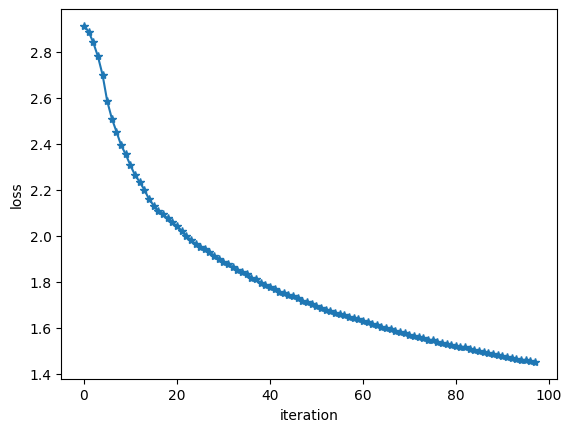

In [ ]:
n_hidden =128
net = RNN_net(n_letters,n_hidden,n_languages)
train_setup(net,lr =0.0005,n_batches =100,batch_size=256)

#LSTM cell

In [ ]:
class LSTM_net(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(LSTM_net,self).__init__()
    self.hidden_size = hidden_size
    self.lstm_cell = nn.LSTM(input_size,hidden_size)
    self.h2o = nn.Linear(hidden_size,output_size)
    self.softmax = nn.LogSoftmax(dim=2)

  def forward(self,input_,hidden):
    out,hidden =self.lstm_cell(input_.view(1,1,-1),hidden)    #input is reshaped to 1x1x as many letters.supports multiple layers,batches,characters.ignoring out.
    output = self.h2o(hidden[0])
    output = self.softmax(output)
    return output.view(1,-1),hidden

  def init_hidden(self):
    return (torch.zeros(1,1,self.hidden_size),torch.zeros(1,1,self.hidden_size))          #tuple : one is for hiddden state other for cell state
    # num of layers,batches,size

Iteration 99 Top-1: 0.5331670822942643 top-2: 0.6765586034912718


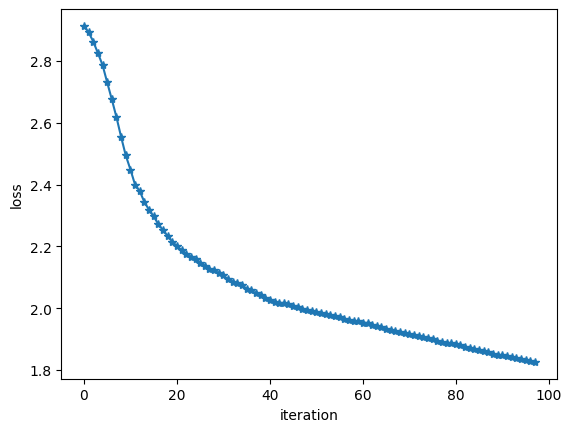

In [ ]:
n_hidden = 128
net = LSTM_net(n_letters,n_hidden,n_languages)
train_setup(net,lr=0.0005,n_batches = 100,batch_size = 256)

#GRU cell

we wont have cell state here

In [ ]:
class GRU_net(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(GRU_net,self).__init__()
    self.hidden_size = hidden_size
    self.gru_cell = nn.GRU(input_size,hidden_size)
    self.h2o = nn.Linear(hidden_size,output_size)
    self.softmax = nn.LogSoftmax(dim=2)

  def forward(self,input_,hidden):
    out,hidden =self.gru_cell(input_.view(1,1,-1),hidden)
    output = self.h2o(hidden)
    output = self.softmax(output)
    return output.view(1,-1),hidden

  def init_hidden(self):
    return torch.zeros(1,1,self.hidden_size)

Iteration 99 Top-1: 0.6077306733167083 top-2: 0.7234413965087282


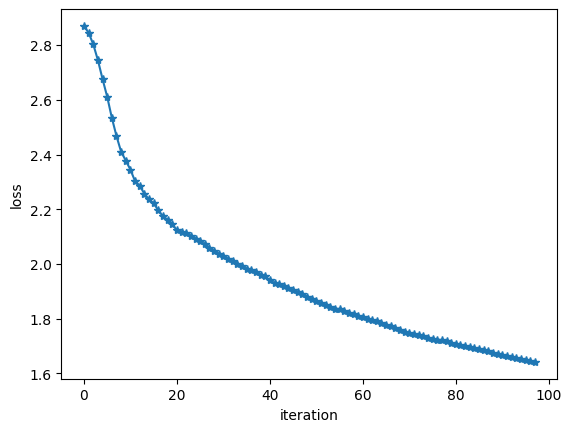

In [ ]:
n_hidden = 128
net = GRU_net(n_letters,n_hidden,n_languages)
train_setup(net,lr=0.0005,n_batches = 100,batch_size = 256)

#Batching

In [ ]:
def batched_name_rep(names,max_word_size):
  rep = torch.zeros(max_word_size,len(names),n_letters)
  for name_index,name in enumerate(names):
    for letter_index,letter in enumerate(name):
      pos = all_letters.find(letter)
      rep[letter_index][name_index][pos] = 1
  return rep

In [ ]:
def print_char(name_reps):
  name_reps = name_reps.view((-1,name_reps.size()[-1]))
  for t in name_reps:
    if torch.sum(t) == 0:
      print('<pad>')
    else:
      index = t.argmax()
      print(all_letters[index])

In [ ]:
out_ = batched_name_rep(['Shyam','Ram'],5)
print(out_)
print(out_.shape)
print_char(out_)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0

In [ ]:
def batched_lang_rep(langs):
  rep = torch.zeros([len(langs)],dtype=torch.long)
  for index,lang in enumerate(langs):
    rep[index] = languages.index(lang)
  return rep